In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from xml.etree import ElementTree as ET

plt.style.use('ggplot')

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Importing the datasets

In [4]:
df_sales = pd.read_csv('datasets/real_property_sales_and_transfers.csv')

C:\Users\Trent\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_characteristics = pd.read_csv('datasets/real_property_residential_characteristics.csv', error_bad_lines=False)

Skipping line 63332: expected 46 fields, saw 47
Skipping line 63335: expected 46 fields, saw 47
Skipping line 63338: expected 46 fields, saw 47

Skipping line 68348: expected 46 fields, saw 48
Skipping line 69469: expected 46 fields, saw 47
Skipping line 69470: expected 46 fields, saw 47
Skipping line 69471: expected 46 fields, saw 47
Skipping line 69472: expected 46 fields, saw 47



## Filtering the data to only show single family homes

In [6]:
single_family_home_id = '113'
single_family_home_definition = 'SINGLE FAMILY'

df_sales = df_sales[df_sales.D_CLASS == single_family_home_id]

In [8]:
df_characteristics = df_characteristics[df_characteristics.D_CLASS_CN == single_family_home_definition]

## df_sales Data Dictionary

In [11]:
sales_dict = pd.read_excel('datasets/RealPropertyMetaData.xlsx', sheetname='Sales_Transfers', header=3, parse_cols=[1,2,3,5])
sales_dict

,Field Name,Example,Column Type,Description
0,PIN,163752899,Text,Assessor's Property Identification Number
1,SCHEDNUM,0231416005000,Text,Assessor's Schedule Number
2,RECEPTION_NUM,2011148564,Text,Clerk & Recorder's Reception Number
3,RECEPTION_DATE,20101004,Text,Clerk & Recorder's Reception Date
4,INSTRUMENT,WD,Text,Type of Instrument
5,SALE_YEAR,2010,Text,Sale Year
6,SALE_MONTHDAY,0928,Text,Sale Month/Day
7,SALE_PRICE,199677,Text,Sale Price
8,GRANTOR,"SMITH, JOHN & JANE",Text,Person(s) relinquishing ownership
9,GRANTEE,"BROWN, JAMES",Text,Person(s) recieving ownership


## df_characteristics Data Dictionary

In [6]:
characteristics_dict = pd.read_excel('datasets/RealPropertyMetaData.xlsx', sheetname='Residential_Characteristics', header=3, parse_cols=[1,2,3,5])
characteristics_dict

,Field Name,Example,Column Type,Description
0,PIN,161714761,Text,Assessor's Property Identification Number
1,SCHEDNUM,0226327008000,Text,Assessor's Schedule Number
2,CD,01,Text,Building Number
3,OFCARD,01,Text,Number of Buildings
4,OWNER,"SMITH, JOHN",Text,Owner
5,CO_OWNER,TYLER,Text,Co-Owner
6,OWNER_NUM,003650,Text,Street Mailing Number
7,OWNER_DIR,S,Text,Street Mailing Direction
8,OWNER_ST,YOSEMITE,Text,Street Mailing Street Name
9,OWNER_TYPE,ST,Text,Street Mailing Type


## Looking at summary statistics and the basic shape of the data

### *df_sales* AKA: the dataset with the home sales info

In [7]:
df_sales.shape

(234824, 16)

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234824 entries, 0 to 234823
Data columns (total 16 columns):
SCHEDNUM          234824 non-null int64
RECEPTION_NUM     234824 non-null object
INSTRUMENT        234824 non-null object
SALE_YEAR         234824 non-null int64
SALE_MONTHDAY     234824 non-null int64
RECEPTION_DATE    234824 non-null int64
SALE_PRICE        165431 non-null float64
GRANTOR           234824 non-null object
GRANTEE           234824 non-null object
CLASS             234824 non-null object
MKT_CLUS          224029 non-null float64
D_CLASS           234824 non-null object
D_CLASS_CN        234775 non-null object
NBHD_1            234824 non-null int64
NBHD_1_CN         234824 non-null object
PIN               234824 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 28.7+ MB


In [9]:
df_sales.describe()

,SCHEDNUM,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,MKT_CLUS,NBHD_1,PIN
count,234824.000,234824.000,234824.000,234824.000,165431.000,224029.000,234824.000,234824.000
mean,387336752194.890,2011.918,662.937,20120316.570,592534.596,25.768,398.547,162054260.713
std,223869952158.367,2.561,330.008,48541.241,4082154.598,17.092,235.559,1099712.526
min,3100025000.000,2008.000,101.000,130328.000,1.000,0.000,1.000,160088986.000
25%,220331003750.000,2010.000,409.000,20100325.000,98000.000,11.000,215.000,161130939.250
50%,503409046046.000,2012.000,628.000,20120821.000,225000.000,23.000,512.000,161810948.000
75%,527511015000.000,2014.000,923.000,20140922.000,398000.000,41.000,588.000,163099534.250
max,915401173173.000,2016.000,1231.000,20160909.000,387500000.000,56.000,906.000,164097228.000


In [10]:
df_sales.D_CLASS_CN.value_counts()

SINGLE FAMILY                    139043
CONDOMINIUM                       44927
ROWHOUSE                          24597
101 CONDO PKG                      3896
APT W/2 UNITS                      2923
VCNT LAND R-2, RS-2 ZONE           2655
WAREHOUSE                          1855
APT LOW-RISE>9UNT, WALK-UP          955
OFFICE BLDG                         948
MISC ROWHOUSE IMPS                  868
APT W/4 UNITS                       734
VCNT LAND - RES RATIO               723
RETAIL, SINGLE                      515
OFFICE CONDO                        508
APT W/3 UNITS                       490
MISC IMPS-TIE BACK                  470
RESTAURANT                          436
RETAIL, MULTI                       386
VCNT LAND R-0 & R-1 ZONE            369
DCL MISC RES IMPS                   326
VCNT LAND B-3 BA3 CCN               323
VCNT LAND B4 BA4 ZONE               318
MISC CONDO IMPS                     263
OFFICE CONVRSN                      260
VCNT LAND I-1 ZONE                  255


### df_characteristics AKA the dataset with the characteristics of the property

In [11]:
df_characteristics.shape

(199900, 46)

In [12]:
df_characteristics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199900 entries, 0 to 199899
Data columns (total 46 columns):
PIN                 199900 non-null int64
SCHEDNUM            199900 non-null int64
CD                  199900 non-null int64
OFCARD              199900 non-null int64
OWNER               199900 non-null object
CO_OWNER            6386 non-null object
OWNER_NUM           199900 non-null object
OWNER_DIR           104080 non-null object
OWNER_ST            199900 non-null object
OWNER_TYPE          193647 non-null object
OWNER_APT           39746 non-null object
OWNER_CITY          199900 non-null object
OWNER_STATE         199899 non-null object
OWNER_ZIP           199878 non-null object
SITE_NBR            199900 non-null int64
SITE_DIR            111693 non-null object
SITE_NAME           199900 non-null object
SITE_MODE           199752 non-null object
SITE_MORE           49137 non-null object
TAX_DIST            199900 non-null object
PROP_CLASS          199897 non-null fl

In [13]:
df_characteristics.describe()

,PIN,SCHEDNUM,CD,OFCARD,SITE_NBR,PROP_CLASS,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,GRD_AREA,STORY,BED_RMS,FULL_B,HLF_B,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1
count,199900.000,199900.000,199900.000,199900.000,199900.000,199897.000,199237.000,199900.000,199900.000,199900.000,199900.000,199900.000,199900.000,189975.000,189975.000,189975.000,189975.000,199900.000,199897.000,199897.000,199897.000,199897.000,199897.000,199897.000,199900.000
mean,161927454.469,415342716683.122,1.000,1.004,3508.273,1243.679,5469.410,1331.988,494.765,279.279,25.351,1.258,2.380,1.817,0.317,1958.500,670.078,0.972,118925.035,320150.834,9797.991,25826.792,25512.963,314.733,427.225
std,1006785.065,226091485567.402,0.000,0.143,3680.081,1055.715,13570.857,775.348,550.456,438.425,128.688,0.575,1.044,0.836,0.498,33.829,944.869,0.318,187443.778,304903.732,36728.829,41306.037,22694.719,34743.879,237.171
min,160088986.000,4100122000.000,1.000,1.000,1.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1873.000,0.000,0.000,0.000,100.000,0.000,8.000,0.000,0.000,1.000
25%,161117408.750,225249013750.000,1.000,1.000,1225.000,1112.000,2402.000,887.000,0.000,0.000,0.000,1.000,2.000,1.000,0.000,1938.000,0.000,1.000,31500.000,162900.000,2531.000,13039.000,12950.000,0.000,228.000
50%,161748546.500,508505004000.000,1.000,1.000,2626.000,1112.000,5600.000,1154.000,328.500,0.000,0.000,1.000,2.000,2.000,0.000,1957.000,0.000,1.000,65100.000,256600.000,5262.000,20520.000,20420.000,0.000,522.000
75%,162774713.500,604215029500.000,1.000,1.000,4521.000,1114.000,6880.000,1623.000,930.000,589.000,0.000,2.000,3.000,2.000,1.000,1983.000,2000.000,1.000,166200.000,394100.000,13381.000,31506.000,31410.000,0.000,601.000
max,164096558.000,1223100055000.000,1.000,26.000,26100.000,9429.000,2958350.000,18231.000,8896.000,7565.000,3350.000,4.000,15.000,9.000,5.000,2016.000,3994.000,10.000,51801100.000,51801100.000,15022319.000,15022319.000,803530.000,15022320.000,906.000


## Looking at one schedule number (piece of property) across all three datasets

In [14]:
df_sales[df_sales.SCHEDNUM == 23307028000]

,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,MKT_CLUS,D_CLASS,D_CLASS_CN,NBHD_1,NBHD_1_CN,PIN
18205,23307028000,2016099458,WD,2016,722,20160728,330000.000,"WASHINGTON,QUIANA","PHIFER,DONALD & NICOLE",R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18206,23307028000,2012005557,SW,2011,1215,20120117,185000.000,NAVY FEDERAL CREDIT UNION,"WASHINGTON,QUIANA",R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18207,23307028000,2010142026,QC,2010,1124,20101207,nan,"NADOL,DAVID J & THERESE J","NADOL,THERESE J",R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18208,23307028000,2011096228,PT,2011,829,20110829,nan,"NADOL,THERESE J",NAVY FEDERAL CREDIT UNION,R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18209,23307028000,2015111855,QC,2015,807,20150811,1.000,"WASHINGTON,QUIANA","WASHINGTON,QUIANA",R,1.000,113,SINGLE FAMILY,3,GREEN VALLEY,162802499


In [15]:
df_characteristics[df_characteristics.SCHEDNUM == 23307028000]

,PIN,SCHEDNUM,CD,OFCARD,OWNER,CO_OWNER,OWNER_NUM,OWNER_DIR,OWNER_ST,OWNER_TYPE,OWNER_APT,OWNER_CITY,OWNER_STATE,OWNER_ZIP,SITE_NBR,SITE_DIR,SITE_NAME,SITE_MODE,SITE_MORE,TAX_DIST,PROP_CLASS,PROPERTY_CLASS,ZONE10,D_CLASS_CN,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,GRD_AREA,STORY,STYLE_CN,BED_RMS,FULL_B,HLF_B,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1,NBHD_1_CN,LEGL_DESCRIPTION
14053,162802499,23307028000,1,1,"PHIFER,DONALD AND NICOLE",NaN,4063,NaN,JERICHO,ST,NaN,DENVER,CO,80249-8184,4063,NaN,JERICHO,ST,NaN,149C,1112.000,Single Family Residential,R-2-A,SINGLE FAMILY,5406.000,2144,1074,967,0,2.000,TWO-STORY,3,3.000,1.000,2000.000,2004.000,1,37400.000,262200.000,2977.000,20871.000,20870.000,0.000,3,GREEN VALLEY,GREEN VALLEY RANCH FLG #26 B5 L28


## Combining the dataframes

In [16]:
df_denver = df_sales.merge(df_characteristics, how='left', on='SCHEDNUM')

## Looking over the new dataframe for any problems

In [17]:
df_denver.describe()

,SCHEDNUM,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,MKT_CLUS,NBHD_1_x,PIN_x,PIN_y,CD,OFCARD,SITE_NBR,PROP_CLASS,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,GRD_AREA,STORY,BED_RMS,FULL_B,HLF_B,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y
count,234824.000,234824.000,234824.000,234824.000,165431.000,224029.000,234824.000,234824.000,218087.000,218087.000,218087.000,218087.000,218085.000,217465.000,218087.000,218087.000,218087.000,218087.000,218087.000,218087.000,208845.000,208845.000,208845.000,208845.000,218087.000,218085.000,218085.000,218085.000,218085.000,218085.000,218085.000,218087.000
mean,387336752194.890,2011.918,662.937,20120316.570,592534.596,25.768,398.547,162054260.713,162061485.633,1.000,1.004,3631.709,1150.077,5003.254,1365.739,475.096,294.920,22.132,1.314,2.396,1.907,0.345,1962.112,863.127,0.976,110876.671,334845.660,9060.924,26890.390,26845.999,45.297,400.054
std,223869952158.367,2.561,330.008,48541.241,4082154.598,17.092,235.559,1099712.526,1094092.090,0.000,0.147,3839.843,631.263,11587.422,785.414,551.535,449.865,120.097,0.610,1.013,0.853,0.513,35.819,992.924,0.304,133437.451,294414.262,12523.579,24185.282,23695.990,5081.252,238.667
min,3100025000.000,2008.000,101.000,130328.000,1.000,0.000,1.000,160088986.000,160088986.000,1.000,1.000,1.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1873.000,0.000,0.000,0.000,100.000,0.000,8.000,0.000,0.000,1.000
25%,220331003750.000,2010.000,409.000,20100325.000,98000.000,11.000,215.000,161130939.250,161153887.000,1.000,1.000,1250.000,1112.000,2268.000,897.000,0.000,0.000,0.000,1.000,2.000,1.000,0.000,1941.000,0.000,1.000,30800.000,167400.000,2491.000,13404.000,13390.000,0.000,213.000
50%,503409046046.000,2012.000,628.000,20120821.000,225000.000,23.000,512.000,161810948.000,161823811.000,1.000,1.000,2680.000,1112.000,4900.000,1175.000,230.000,0.000,0.000,1.000,2.000,2.000,0.000,1961.000,0.000,1.000,61600.000,263700.000,4975.000,21086.000,21060.000,0.000,514.000
75%,527511015000.000,2014.000,923.000,20140922.000,398000.000,41.000,588.000,163099534.250,163099714.000,1.000,1.000,4576.000,1114.000,6500.000,1676.000,910.000,645.000,0.000,2.000,3.000,2.000,1.000,1999.000,2006.000,1.000,147800.000,416700.000,12028.000,33313.000,33300.000,0.000,589.000
max,915401173173.000,2016.000,1231.000,20160909.000,387500000.000,56.000,906.000,164097228.000,164095055.000,1.000,26.000,21998.000,9429.000,2768914.000,16980.000,8896.000,5460.000,2875.000,4.000,15.000,9.000,5.000,2016.000,3994.000,10.000,8690200.000,9718000.000,2273194.000,2273194.000,773550.000,2273190.000,906.000


In [18]:
df_denver.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234824 entries, 0 to 234823
Data columns (total 61 columns):
SCHEDNUM            234824 non-null int64
RECEPTION_NUM       234824 non-null object
INSTRUMENT          234824 non-null object
SALE_YEAR           234824 non-null int64
SALE_MONTHDAY       234824 non-null int64
RECEPTION_DATE      234824 non-null int64
SALE_PRICE          165431 non-null float64
GRANTOR             234824 non-null object
GRANTEE             234824 non-null object
CLASS               234824 non-null object
MKT_CLUS            224029 non-null float64
D_CLASS             234824 non-null object
D_CLASS_CN_x        234775 non-null object
NBHD_1_x            234824 non-null int64
NBHD_1_CN_x         234824 non-null object
PIN_x               234824 non-null int64
PIN_y               218087 non-null float64
CD                  218087 non-null float64
OFCARD              218087 non-null float64
OWNER               218087 non-null object
CO_OWNER            6529 non-n

## Creating a datetime column from the data and making it the index

In [19]:
days = []
months = []
years = df_denver.SALE_YEAR.astype(str)
datetimes = []

for row in df_denver.SALE_MONTHDAY:
    row = str(row)
    if len(row) < 4:
        row = '0' + row
    days.append(row[:-2])
    months.append(row[2:])
    


In [20]:
df_denver['date'] = years + '-' + months + '-' + days

In [21]:
df_denver['date'] = pd.to_datetime(df_denver['date'], format='%Y-%d-%m')

In [22]:
df_denver.index = df_denver.date

In [23]:
df_denver['year'] = df_denver.index.year
df_denver['month'] = df_denver.index.month
df_denver['day'] = df_denver.index.day

## Ordering the observations by date

In [24]:
df_denver.sort_values('date', inplace=True)

## Different Instrument Types

I'm still looking for a complete list of definitions for the deed instrument types, but the most frequent ones are:

| Code | Deed Instrument Type | Definition |
|------|----------------------|------------|
| WD   | Warranty Deed        | A deed in which the grantor (seller) guarantees that he or she holds clear title to a piece of real estate and has a right to sell it to you. The guarantee is not limited to the time the grantor owned the property - it extends back to the property's origins. |
| QC   | Quitclaim Deed       | A deed given to convey whatever right, title, or interest the grantor may have, if any, in a piece of real property. The grantor does not warrant that he or she does in fact have interest to the property. |
| SW   | Special Warranty     | A deed in which the grantor warrants the title for the period of time in which he held title, but does not warrant it with regard to previous owners. |
| PT   | ???                  | ??? |
| PR   | ???                  | ??? |
| DC   | ???                  | ??? |

Definitions from http://www.ocpafl.org/searches/lookups.aspx/code/deed

Since I'm only interested in houses that my wife and I could potentially afford, I'll filter out any home with a sale price 500,000 or more. I'm also filtering out any homes with a sale price lower than 1000 because it has to be incorrect data.

In [25]:
df_denver = df_denver[(df_denver.SALE_PRICE > 1000) & (df_denver.SALE_PRICE < 500000)]

In [26]:
df_denver.groupby('INSTRUMENT')['SALE_PRICE'].mean().sort_values(ascending=False)

INSTRUMENT
BG   356524.375
RC   318929.911
AF   270468.750
WD   247740.230
DD   243600.256
GR   233331.333
BK   225000.000
TR   224840.237
SC   220000.000
PR   209244.022
BS   206637.795
PS   202732.800
CS   200857.188
CD   183089.412
SW   182119.079
DE   172000.000
DF   165066.500
PT   163147.724
AD   146904.348
DC   134400.000
BF   127000.000
DS   124702.500
QC   120021.395
SF    64766.842
TS    54860.500
LE    43368.140
Name: SALE_PRICE, dtype: float64

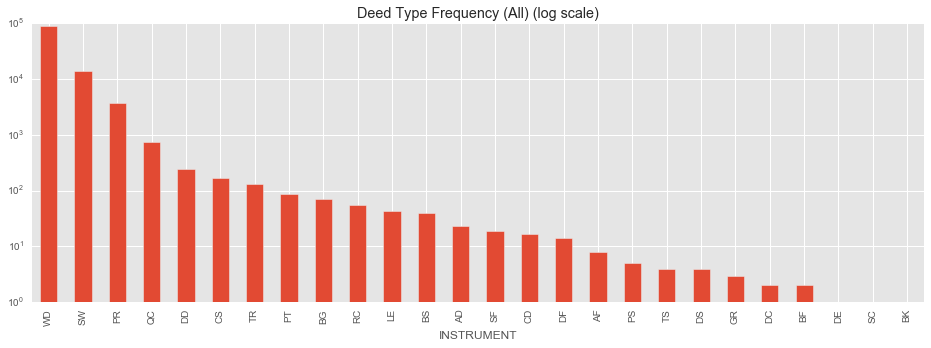

In [27]:
df_denver.groupby('INSTRUMENT').size().sort_values(ascending=False).plot('bar', 
                                                                        figsize=(16,5), 
                                                                        logy=True, 
                                                                        title="Deed Type Frequency (All) (log scale)");

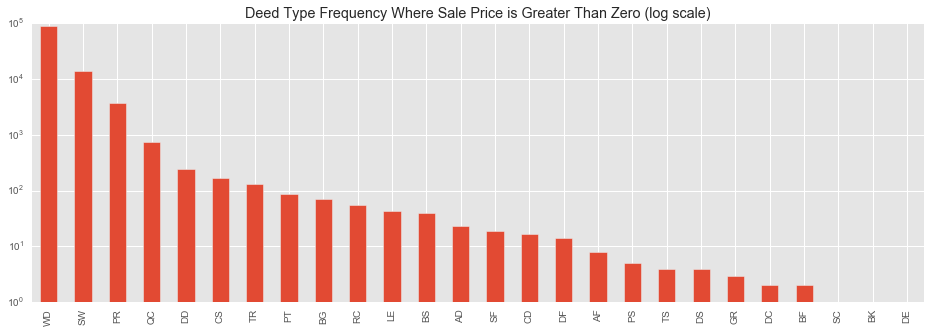

In [28]:
df_denver[df_denver.SALE_PRICE > 0]['INSTRUMENT'].value_counts().plot('bar', figsize=(16,5), logy=True,
                                        title='Deed Type Frequency Where Sale Price is Greater Than Zero (log scale)');

---

# Looking at Mean Sale Prices each Year

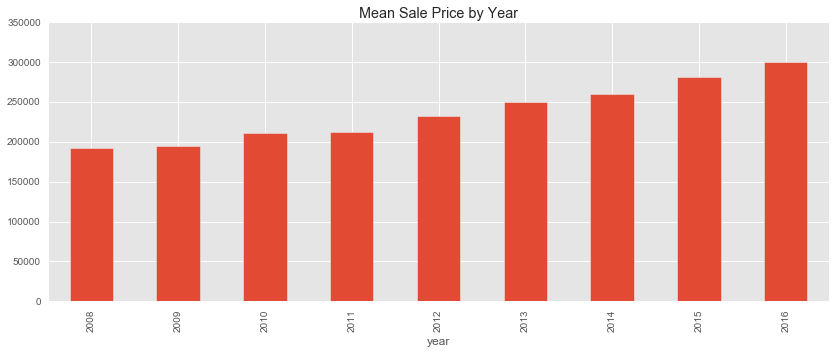

In [30]:
df_sold_houses = df_denver[df_denver.SALE_PRICE > 0]

df_sold_houses.groupby('year')['SALE_PRICE'].mean().plot('bar', figsize=(14,5), title="Mean Sale Price by Year");

## Looking at the transactions by year

In [31]:
df_merge[df_merge.year == 2015].INSTRUMENT.value_counts()

NameError: name 'df_merge' is not defined

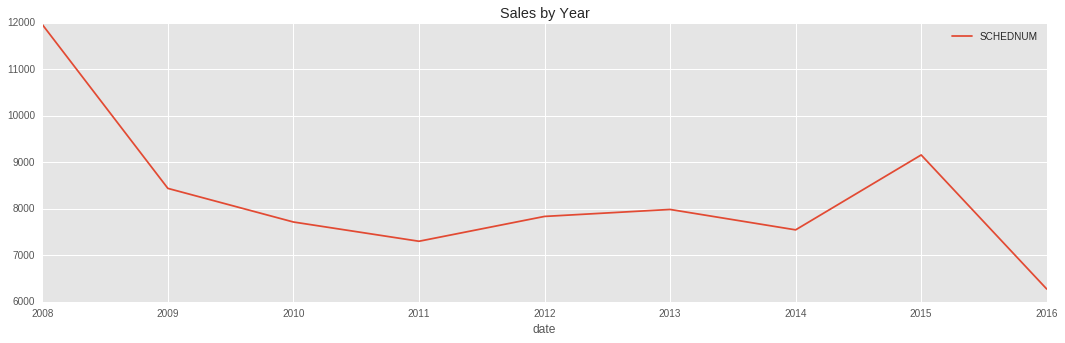

In [39]:
df_yearly_sales = df_merge[['SCHEDNUM']].resample('A').count()

axis = df_yearly_sales.plot(figsize=(18, 5));

axis.set_title("Sales by Year")

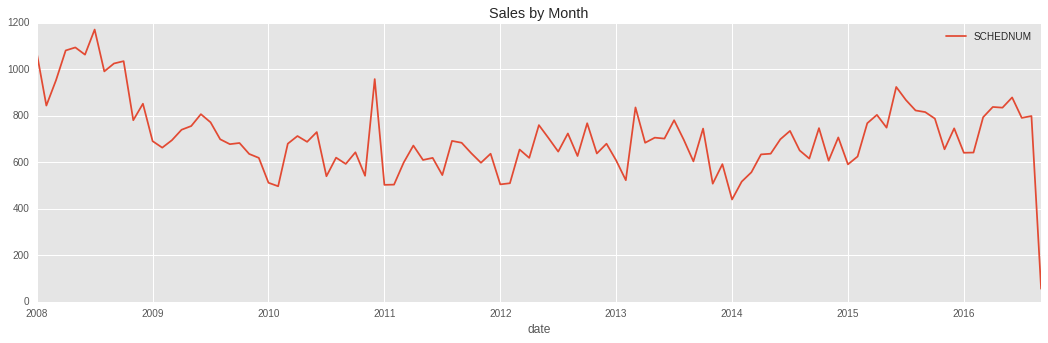

In [40]:
df_monthly_sales = df_merge[['SCHEDNUM']].resample('M').count()

axis = df_monthly_sales.plot(figsize=(18, 5));

axis.set_title("Sales by Month")

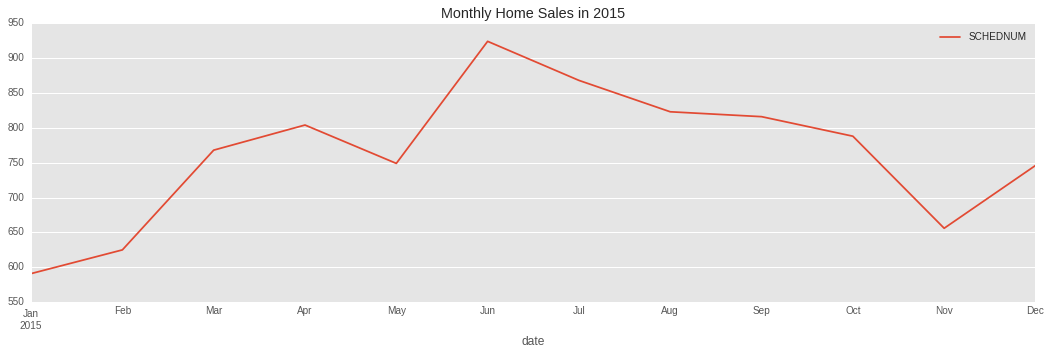

In [41]:
sales_in_2015 = df_merge[['SCHEDNUM']][(df_merge.year == 2015)].resample('M').count()

axis = sales_in_2015.plot(figsize=(18,5));

axis.set_title("Monthly Home Sales in 2015")

### Looking at different characteristics of homes in Denver

In [60]:
df_characteristics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131640 entries, 0 to 199731
Data columns (total 46 columns):
PIN                 131640 non-null int64
SCHEDNUM            131640 non-null int64
CD                  131640 non-null int64
OFCARD              131640 non-null int64
OWNER               131640 non-null object
CO_OWNER            2651 non-null object
OWNER_NUM           131640 non-null object
OWNER_DIR           70057 non-null object
OWNER_ST            131640 non-null object
OWNER_TYPE          128336 non-null object
OWNER_APT           4717 non-null object
OWNER_CITY          131640 non-null object
OWNER_STATE         131639 non-null object
OWNER_ZIP           131634 non-null object
SITE_NBR            131640 non-null int64
SITE_DIR            74512 non-null object
SITE_NAME           131640 non-null object
SITE_MODE           131597 non-null object
SITE_MORE           1666 non-null object
TAX_DIST            131640 non-null object
PROP_CLASS          131639 non-null float6

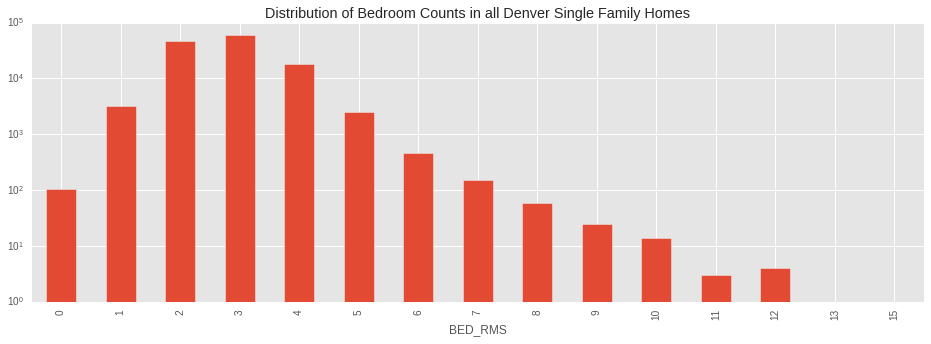

In [90]:
df_characteristics.groupby('BED_RMS').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Distribution of Bedroom Counts in all Denver Single Family Homes', 
                                                  logy=True);

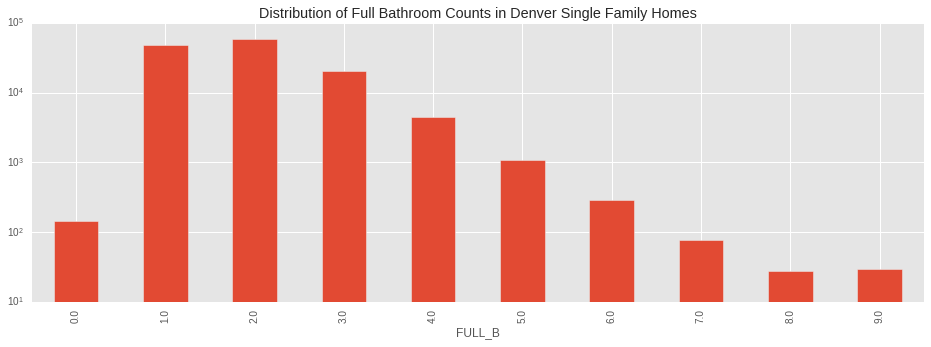

In [89]:
df_characteristics.groupby('FULL_B').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Distribution of Full Bathroom Counts in Denver Single Family Homes', 
                                                  logy=True);

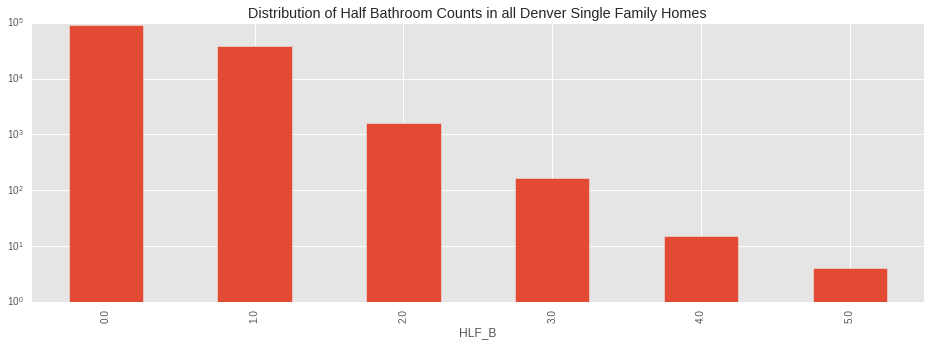

In [88]:
df_characteristics.groupby('HLF_B').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Distribution of Half Bathroom Counts in all Denver Single Family Homes', 
                                                  logy=True);

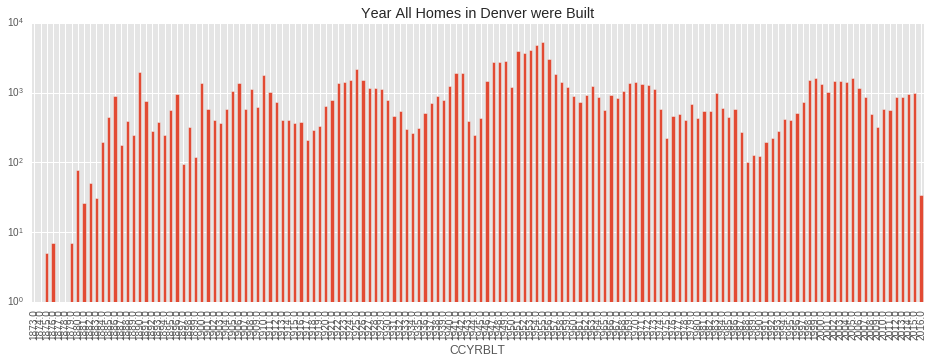

In [92]:
df_characteristics.groupby('CCYRBLT').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Year All Homes in Denver were Built', 
                                                  logy=True);

In [97]:
df_pairplot = df_denver[['SALE_PRICE', 'LAND_SQFT', 'AREA_ABG', 'BED_RMS']].dropna()

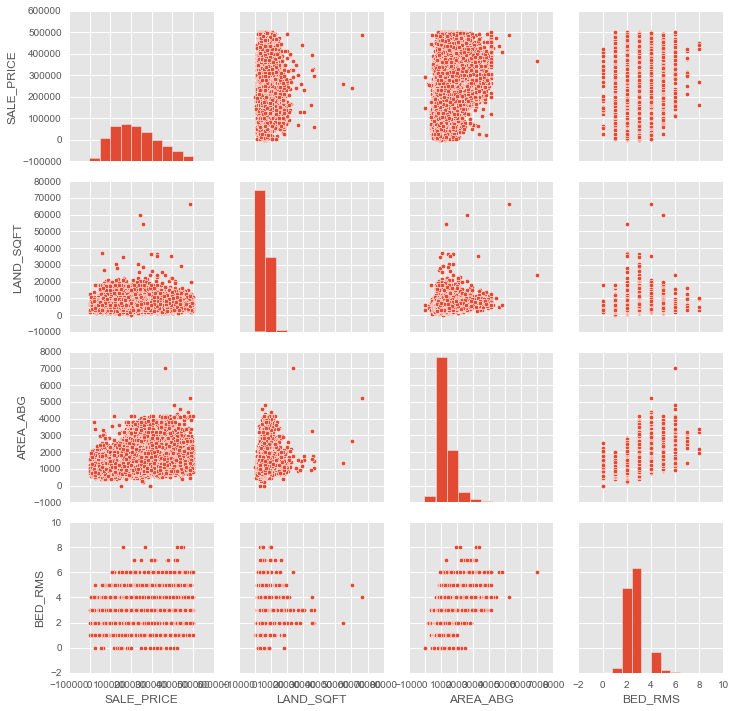

In [98]:
sns.pairplot(df_pairplot)

In [1]:
#keeping this for later

#df_yearly_instruments = df_sales.groupby(['SALE_YEAR', 'INSTRUMENT']).size().unstack().fillna(0)
#top_instruments = df_yearly_instruments.sum().sort_values(ascending=False).head().index